We will be searching and then plotting the most similar images (that have the lowest hist value) to an input image (example: digits.images[0]) from the first 1000 images of the digits dataset.

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Hist Function


In [6]:
import collections
def hist(img, pixel):
    count = collections.Counter(img)
            
    return count[pixel]

In [7]:
def distance_occurence(image1, image2):
    img1 = image1
    img2 = image2
    img1_distinct_ele = img1
    img2_distinct_ele = img2
    distance = 0
    for a in img1_distinct_ele:
        hist_a_img2 = hist(img2, a)
        hist_a_img1 = hist(img1, a)
        
        if hist_a_img2 != hist_a_img1:
            distance += abs(hist_a_img2 - hist_a_img1)
        
    for b in img2_distinct_ele:    
        hist_b_img2 = hist(img2, b)
        hist_b_img1 = hist(img1, b)

        if hist_b_img1 == 0:
            distance += hist_b_img2
        
    return distance

# Computing the hist between images 0 of digits and the next 1000 images

In [37]:
from sklearn import datasets
digits = datasets.load_digits()

# Fixed image
digit1 = digits.images[0]

# Crating an array of results
hist_distance = []

# Computing the hist between the source image and mnist dataset images
for i in range(1000):
  hist_distance.append(distance_occurence(digit1.flatten(), digits.images[i].flatten()))


In [38]:
# printing the array
print("Array of hist distances between source image and each other image: \n", hist_distance)

Array of hist distances between source image and each other image: 
 [0, 338, 127, 110, 223, 285, 258, 140, 171, 183, 158, 293, 223, 93, 137, 134, 235, 117, 210, 242, 146, 283, 204, 158, 356, 257, 269, 200, 154, 250, 186, 259, 204, 216, 126, 101, 138, 145, 122, 89, 130, 210, 317, 308, 176, 254, 187, 344, 90, 58, 145, 179, 170, 173, 140, 198, 315, 323, 162, 178, 202, 154, 252, 132, 180, 209, 232, 305, 259, 269, 369, 101, 195, 202, 171, 360, 158, 168, 93, 94, 256, 165, 238, 230, 78, 319, 147, 237, 317, 285, 254, 171, 178, 355, 234, 344, 125, 159, 201, 409, 286, 124, 305, 251, 322, 191, 312, 470, 223, 191, 259, 258, 96, 187, 211, 194, 152, 232, 145, 207, 228, 277, 263, 219, 218, 274, 267, 218, 105, 313, 126, 257, 193, 298, 343, 199, 222, 292, 310, 241, 175, 363, 207, 206, 295, 250, 124, 276, 259, 166, 123, 262, 216, 189, 220, 228, 317, 218, 72, 211, 320, 277, 211, 224, 130, 205, 226, 84, 118, 257, 179, 414, 346, 214, 130, 142, 164, 233, 255, 105, 205, 198, 317, 124, 252, 310, 419, 218, 19

In [16]:
# Get min from a list
def get_min(list):
  min = list[0]
  for i in list:
    if i < min:
      min = i

  return min

# Get max from a list
def get_max(list):
  max = list[0]
  for i in list:
    if i > max:
      max = i

  return max

# Getting the top 10 most similar images of the 1000 images of digits dataset

In [39]:
def topSimilar(hist_distance):
  min = 0
  input = hist_distance
  similar_images = []
  min_hists = []

  for i in range(10):
      # get min and max values
      min = get_min(input)
      max = get_max(input)

      # Store minimum hist as lables
      min_hists.append(min)
      
      # Get index of the min
      indice = input.index(min)

      # Append the index in the resulted list
      similar_images.append(indice)

      # Reset the min to the max value
      input[indice] = max

  return similar_images, min_hists

similar_images, min_hist = topSimilar(hist_distance)
print("Similar images: ", similar_images)
print("Minimum hists: ", min_hists)

Similar images:  [0, 776, 980, 276, 357, 464, 455, 718, 772, 512]
Minimum hists:  [0, 33, 35, 43, 43, 47, 48, 52, 52, 53]


# Plotting the top10 images with their hist values as labels

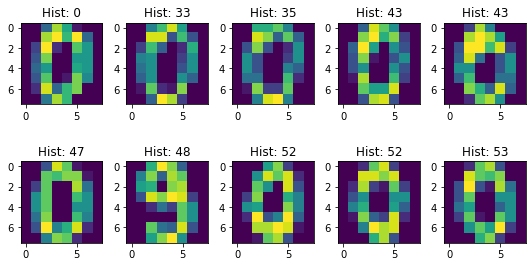

In [41]:
num_col = 5
num_row = 2
num = 10

fig, axes = plt.subplots(num_row, num_col, figsize = (1.5*num_col, 2*num_row))

for i in range(num) :
    ax = axes[i//num_col, i%num_col]
    ax.imshow(digits.images[similar_images[i]])
    ax.set_title('Hist: {}'.format(min_hists[i]))
plt.tight_layout()
plt.show()